<a href="https://colab.research.google.com/github/boskidisanalysis/deeplearningfortimeseries/blob/main/Deep_Learning_for_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
url_path = 'https://raw.githubusercontent.com/PacktPublishing/Deep-Learning-for-Time-Series-Data-Cookbook/main/assets/'


In [ ]:
f'{url_path}assets/datasets/time_series_smf1.csv'

'https://raw.githubusercontent.com/PacktPublishing/Deep-Learning-for-Time-Series-Data-Cookbook/main/assets/assets/datasets/time_series_smf1.csv'

In [ ]:
import matplotlib
# matplotlib.use('TKAgg')

<Axes: xlabel='datetime'>

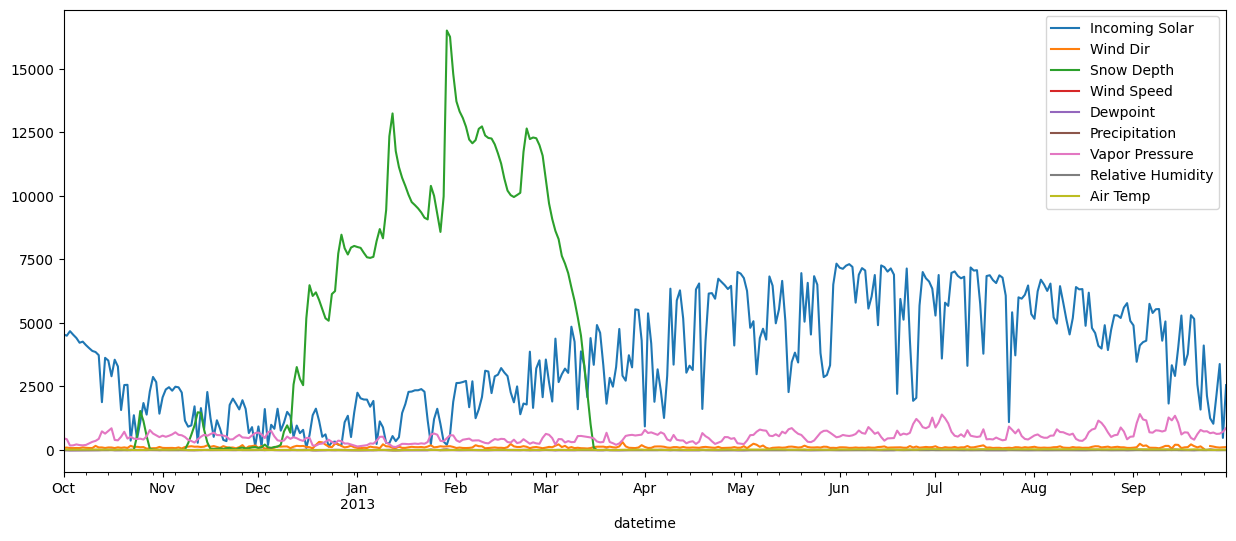

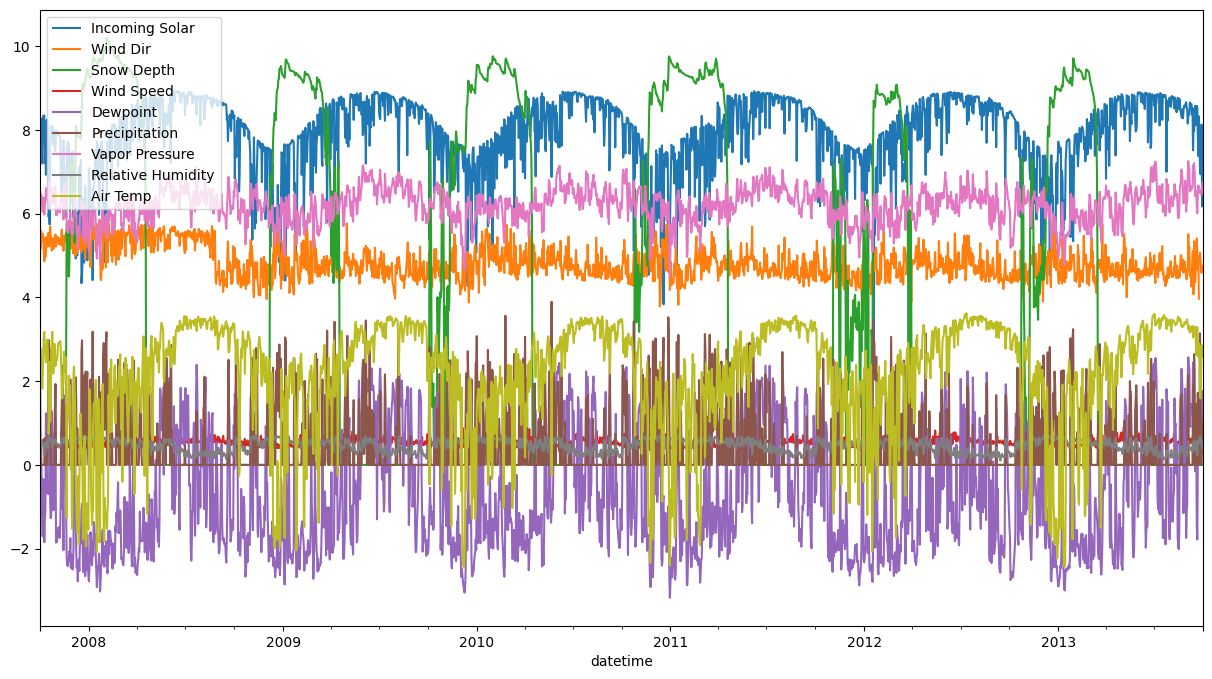

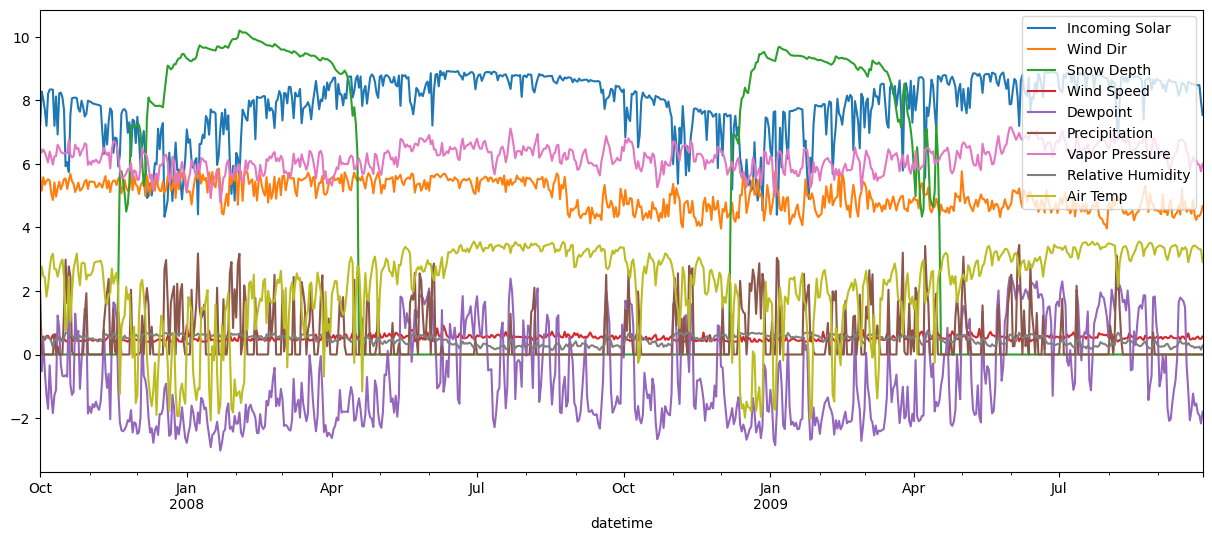

In [ ]:
import pandas as pd
import numpy as np
import matplotlib

# matplotlib.use('TkAgg')

data = pd.read_csv(f'{url_path}/datasets/time_series_smf1.csv',
                   parse_dates=['datetime'],
                   index_col='datetime')

stat_by_variable = {
    'Incoming Solar': 'sum',
    'Wind Dir': 'mean',
    'Snow Depth': 'sum',
    'Wind Speed': 'mean',
    'Dewpoint': 'mean',
    'Precipitation': 'sum',
    'Vapor Pressure': 'mean',
    'Relative Humidity': 'mean',
    'Air Temp': 'max',
}

data_daily = data.resample('D').agg(stat_by_variable)

data_daily.tail(365).plot(figsize=(15, 6))

data_logscale = np.sign(data_daily) * np.log(np.abs(data_daily) + 1)

data_logscale.plot(figsize=(15, 8))
data_logscale.head(365 * 2).plot(figsize=(15, 6))

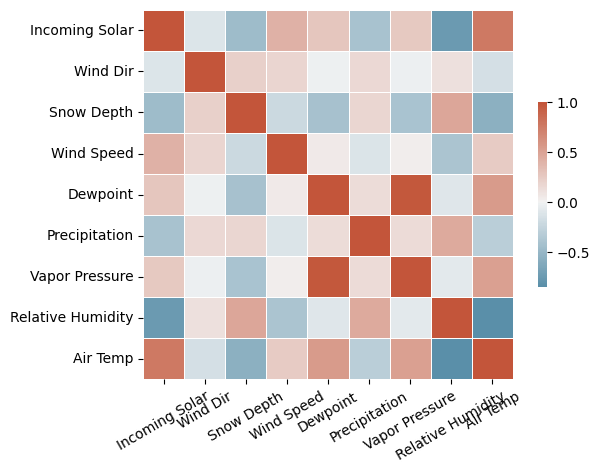

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(f'{url_path}/datasets/time_series_smf1.csv',
                   parse_dates=['datetime'],
                   index_col='datetime')

stat_by_variable = {
    'Incoming Solar': 'sum',
    'Wind Dir': 'mean',
    'Snow Depth': 'sum',
    'Wind Speed': 'mean',
    'Dewpoint': 'mean',
    'Precipitation': 'sum',
    'Vapor Pressure': 'mean',
    'Relative Humidity': 'mean',
    'Air Temp': 'max',
}

data_daily = data.resample('D').agg(stat_by_variable)

# calculate the correlation matrix
corr_matrix = data_daily.corr(method='pearson')

# plot the heatmap
sns.heatmap(data=corr_matrix,
            cmap=sns.diverging_palette(230, 20, as_cmap=True),
            # xticklabels=data_daily.columns,
            # yticklabels=data_daily.columns,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5})

plt.xticks(rotation=30)

plt.savefig('corr_heatmap.png')

In [ ]:
data.head()

,Incoming Solar,Wind Dir,Snow Depth,Wind Speed,Dewpoint,Precipitation,Vapor Pressure,Relative Humidity,Air Temp
datetime,,,,,,,,,
2007-10-01 00:00:00,0.0,261.0,0.0,0.5,-0.8,0.0,573.0,0.49,9.4
2007-10-01 01:00:00,0.0,278.0,0.0,0.5,-0.1,0.0,607.0,0.54,8.7
2007-10-01 02:00:00,0.0,303.0,0.0,0.5,-0.2,0.0,599.0,0.54,8.4
2007-10-01 03:00:00,0.0,274.0,0.0,0.5,-0.5,0.0,585.0,0.55,7.8
2007-10-01 04:00:00,0.0,304.0,0.0,0.6,-0.3,0.0,595.0,0.57,7.7


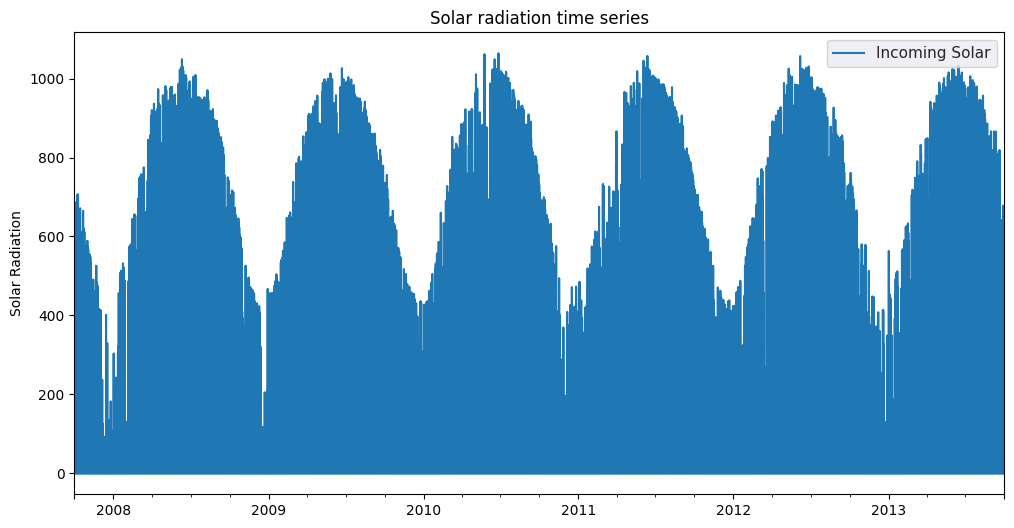

<Figure size 1200x600 with 0 Axes>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv(f'{url_path}/datasets/time_series_solar.csv',
                   parse_dates=['Datetime'],
                   index_col='Datetime')

series = data['Incoming Solar']

series.plot(figsize=(12, 6), title='Solar radiation time series')

series_df = series.reset_index()

plt.rcParams['figure.figsize'] = [12, 6]
sns.set_theme(style='darkgrid')

sns.lineplot(x='Datetime',
             y='Incoming Solar',
             data=series_df)

plt.ylabel('Solar Radiation')
plt.xlabel('')
plt.title('Solar radiation time series')
plt.show()

plt.savefig('time_series_plot.png')

[Text(0.5, 1.0, 'Daily sales count')]

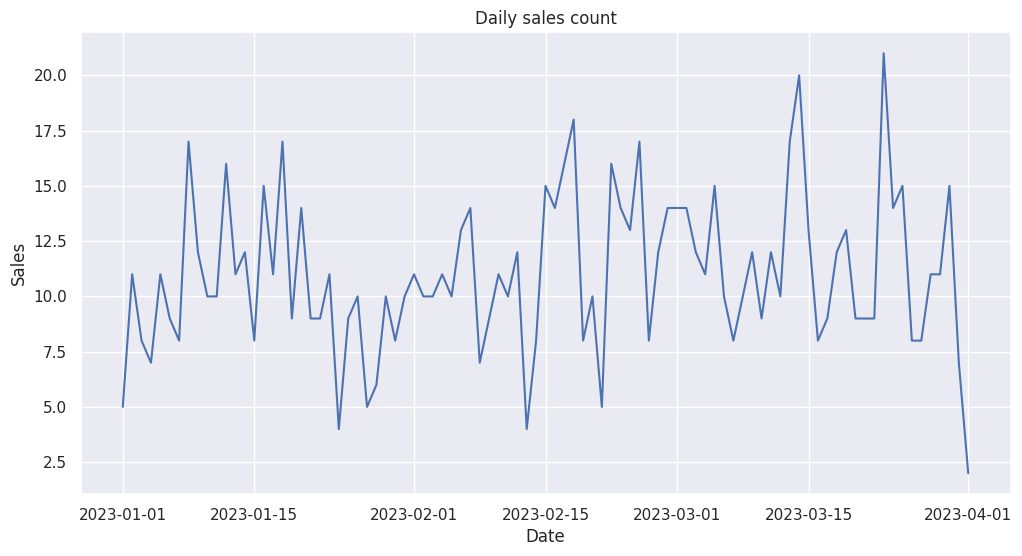

In [ ]:

n_sales = 1000
start = pd.Timestamp('2023-01-01 09:00')
end = pd.Timestamp('2023-04-01')
n_days = (end - start).days + 1

irregular_series = pd.to_timedelta(np.random.rand(n_sales) * n_days,
                                   unit='D') + start

# print(pd.Series(irregular_series.sort_values()[:6]).reset_index().to_latex())

series_sales = pd.Series(0, index=irregular_series).resample('D').count()
series_sales.name = 'Sales'
series_sales.index.name = 'Date'

sns.lineplot(x='Date',
             y='Sales',
             data=series_sales.reset_index()). \
    set(title='Daily sales count')

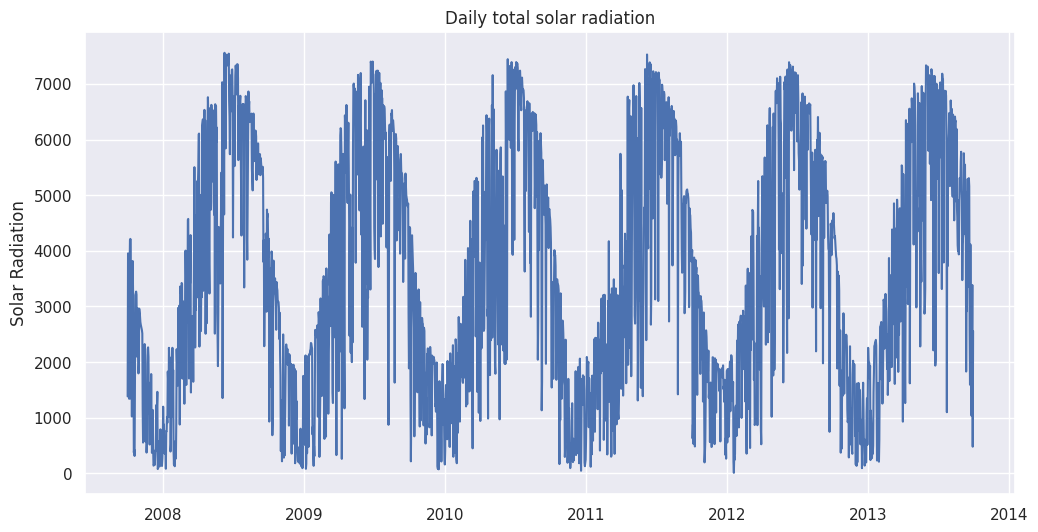

<Figure size 1200x600 with 0 Axes>

In [ ]:
data = pd.read_csv(f'{url_path}/datasets/time_series_solar.csv',
                   parse_dates=['Datetime'],
                   index_col='Datetime')

series = data['Incoming Solar']

series_daily = series.resample('D').sum()

series_df = series_daily.reset_index()

plt.rcParams['figure.figsize'] = [12, 6]

sns.set_theme(style='darkgrid')

sns.lineplot(x='Datetime',
             y='Incoming Solar',
             data=series_df)

plt.ylabel('Solar Radiation')
plt.xlabel('')
plt.title('Daily total solar radiation')
plt.show()

plt.savefig('daily_time_series_plot.png')

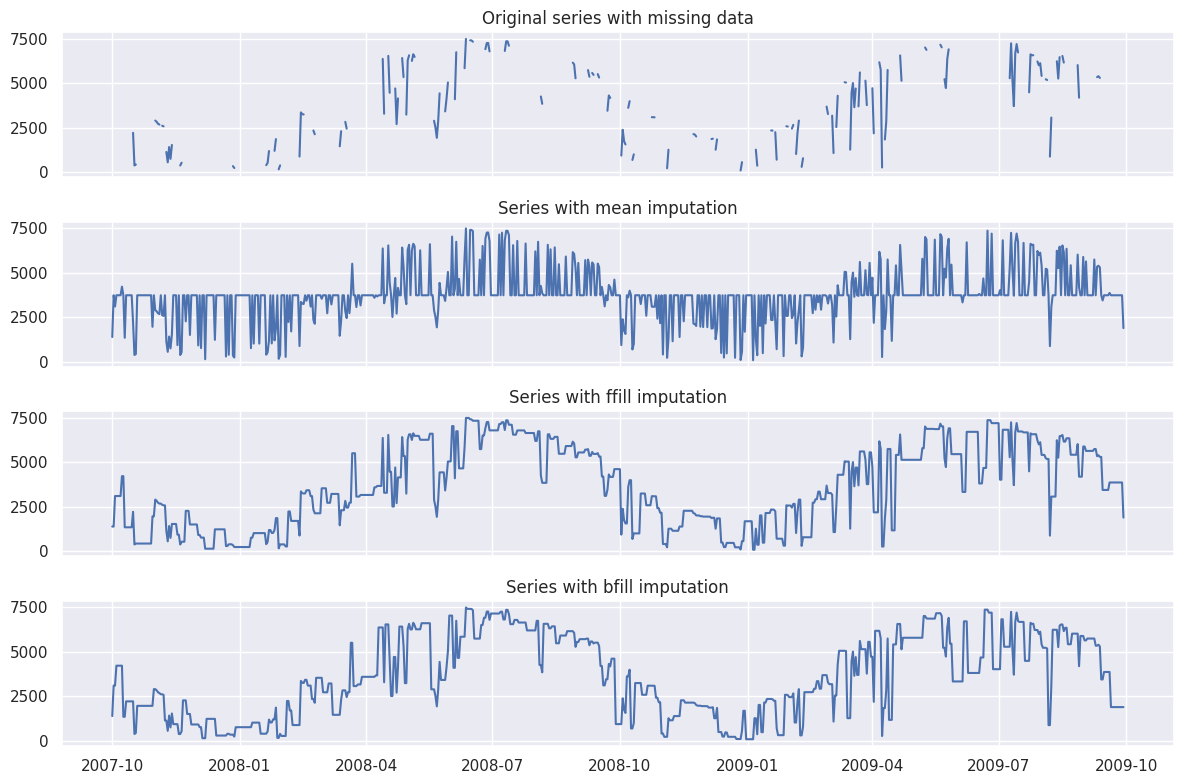

In [ ]:
data = pd.read_csv(f'{url_path}/datasets/time_series_solar.csv',
                   parse_dates=['Datetime'],
                   index_col='Datetime')

series = data['Incoming Solar'].resample('D').sum()

sample_with_nan = series.head(365 * 2).copy()

size_na = int(0.6 * len(sample_with_nan))

idx = np.random.choice(a=range(len(sample_with_nan)),
                       size=size_na,
                       replace=False)

sample_with_nan[idx] = np.nan

# imputation with mean value
avg_value = sample_with_nan.mean()
imp_mean = sample_with_nan.fillna(avg_value)
# imputation with last known observation
imp_ffill = sample_with_nan.ffill()
# imputation with next known observation
imp_bfill = sample_with_nan.bfill()

plt.rcParams['figure.figsize'] = [12, 8]

fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, sharex=True)
# fig.suptitle('Time series imputation methods')

ax0.plot(sample_with_nan)
ax0.set_title('Original series with missing data')
ax1.plot(imp_mean)
ax1.set_title('Series with mean imputation')
ax2.plot(imp_ffill)
ax2.set_title('Series with ffill imputation')
ax3.plot(imp_bfill)
ax3.set_title('Series with bfill imputation')

plt.tight_layout()

plt.savefig('missing_data_plot.png')


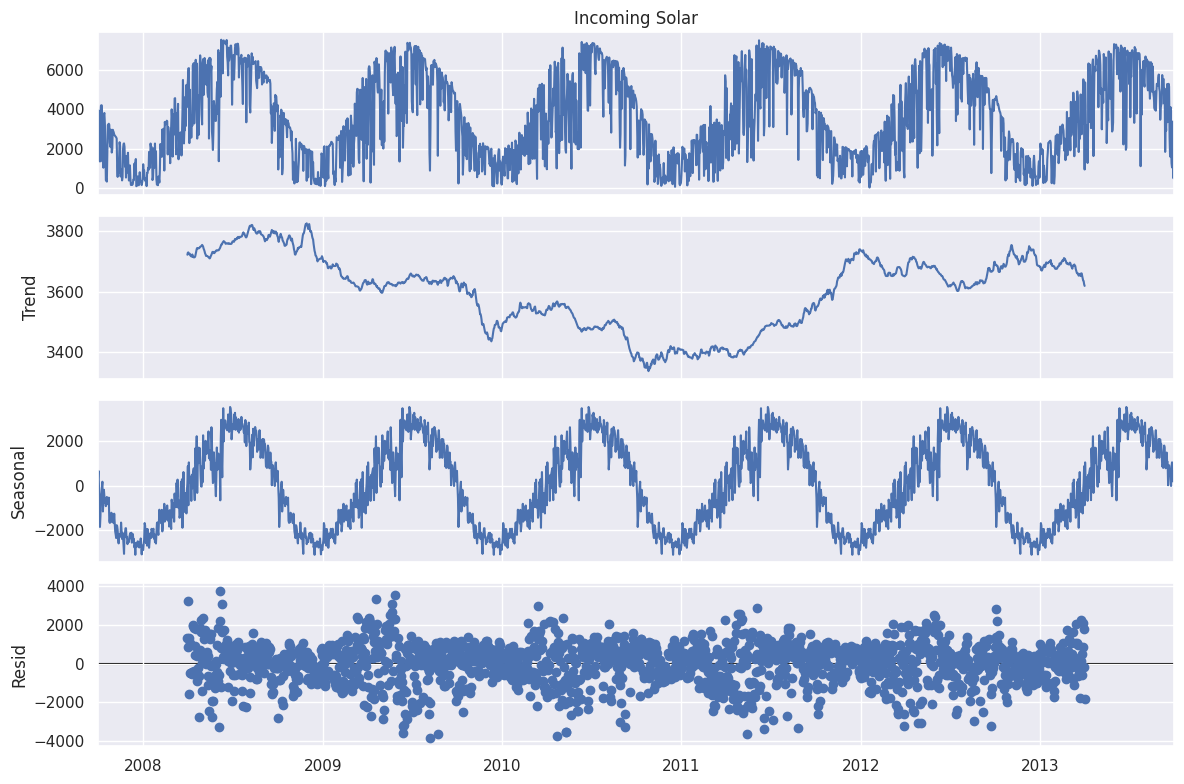

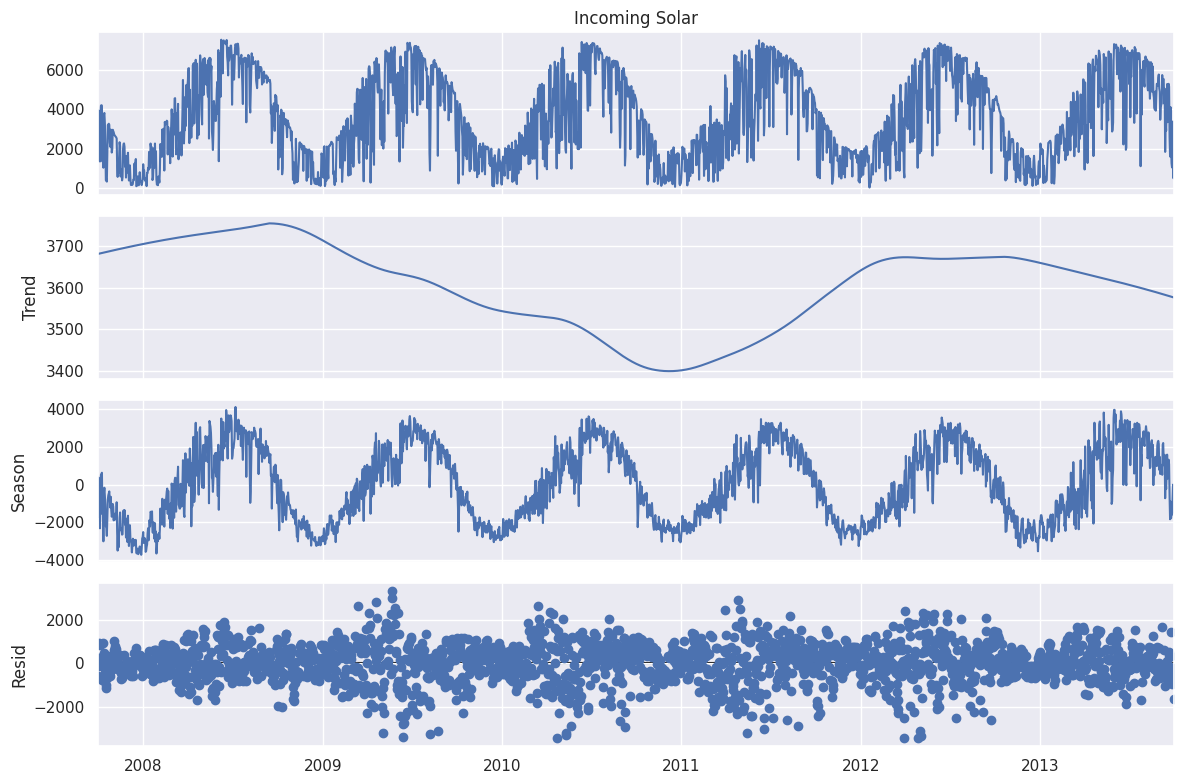

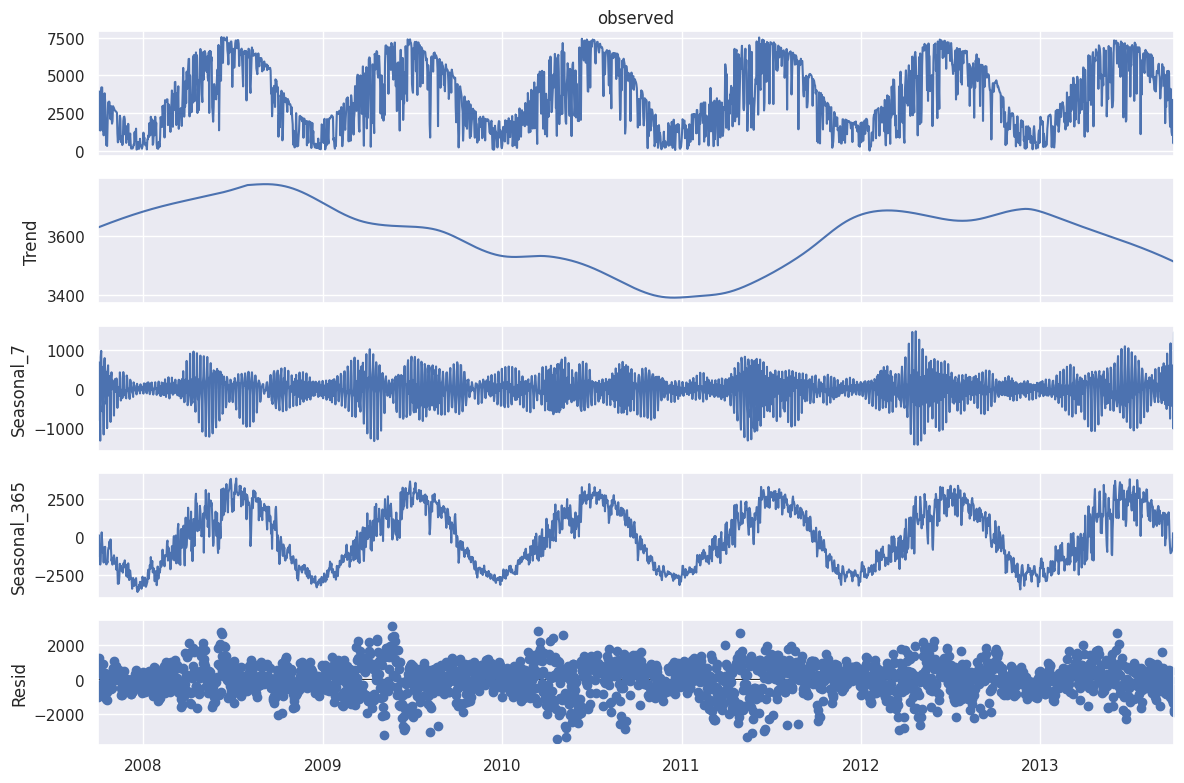

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

data = pd.read_csv(f'{url_path}/datasets/time_series_solar.csv',
                   parse_dates=['Datetime'],
                   index_col='Datetime')

series = data['Incoming Solar']

series_daily = series.resample('D').sum()

result = seasonal_decompose(x=series_daily,
                            model='additive',
                            period=365)

plot = result.plot()

plot.savefig('classical_decomposition.png')

result.seasonal
result.trend
result.resid

# STL

from statsmodels.tsa.seasonal import STL

result = STL(endog=series_daily, period=365).fit()

plot = result.plot()

# MSTL

from statsmodels.tsa.seasonal import MSTL

result = MSTL(endog=series_daily, periods=(7, 365)).fit()

plot = result.plot()

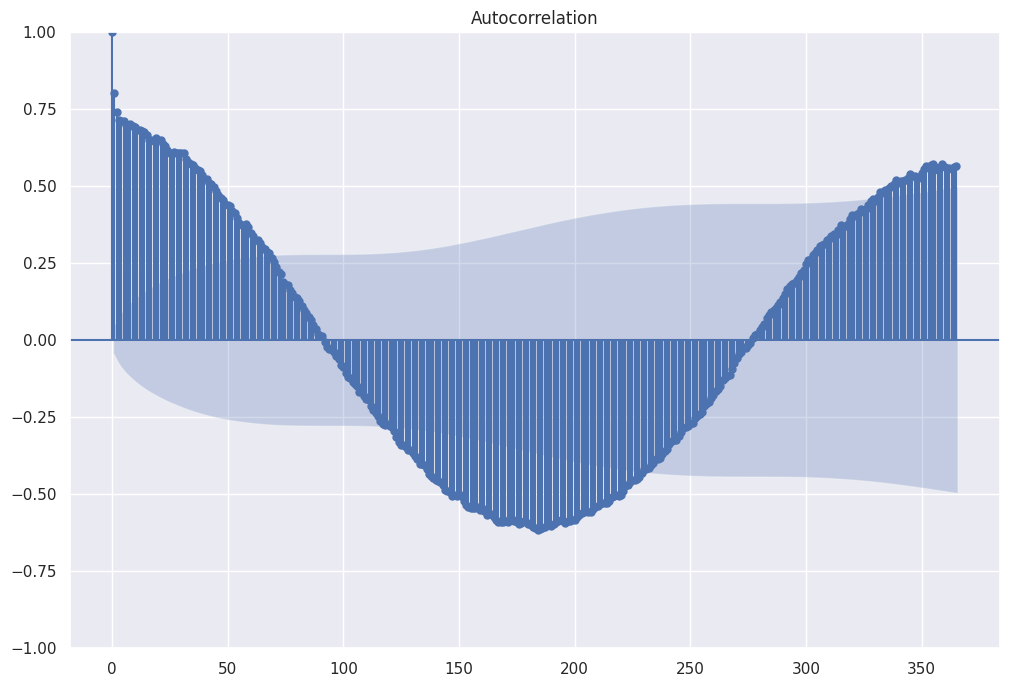

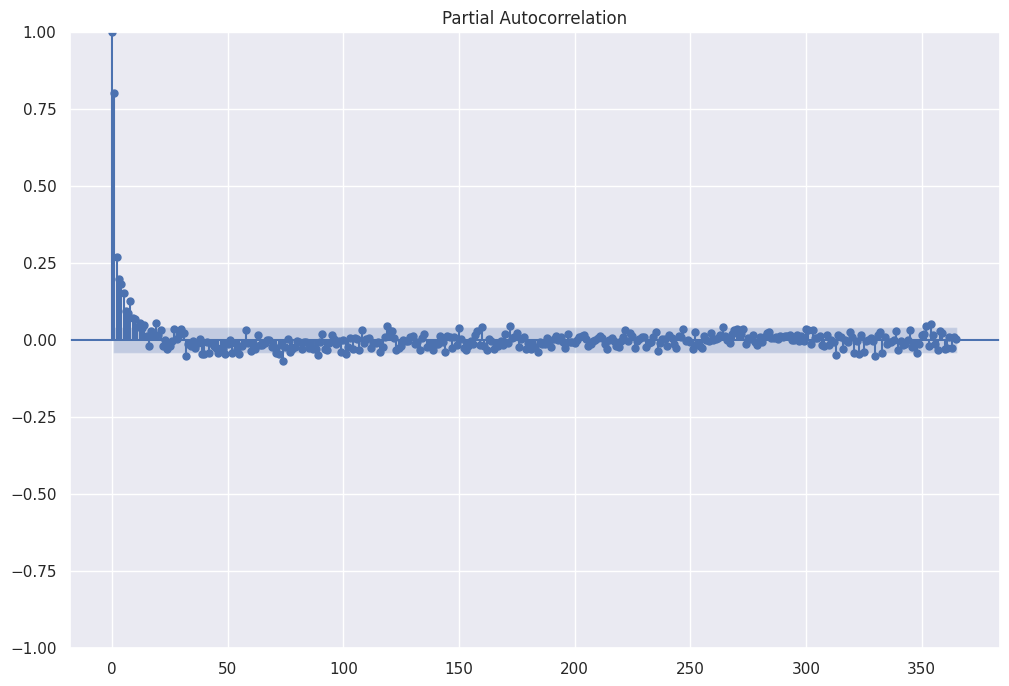

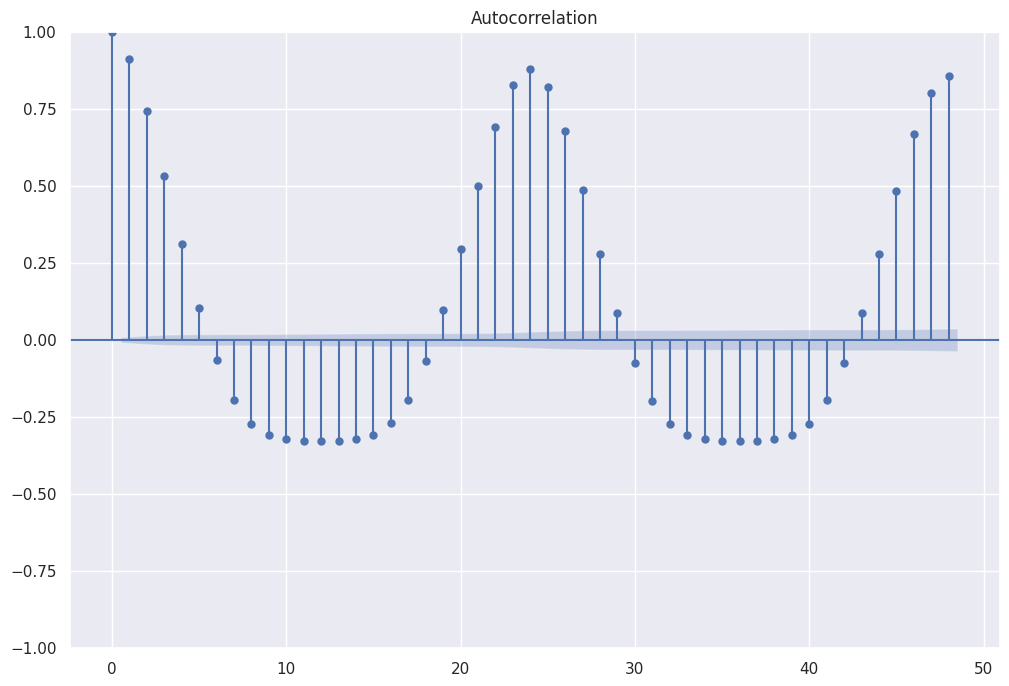

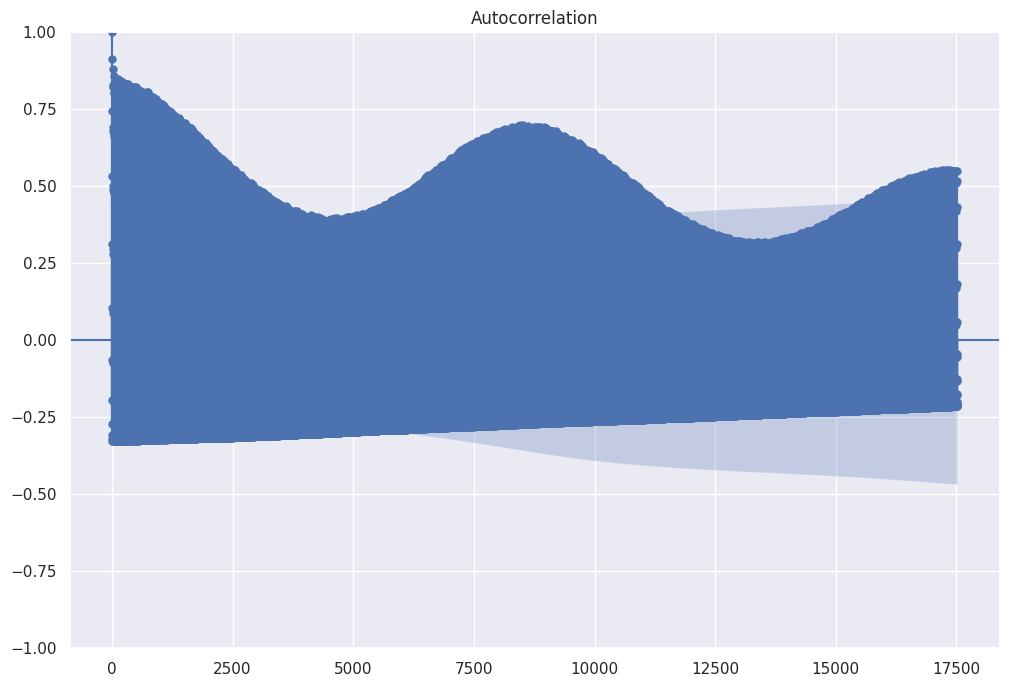

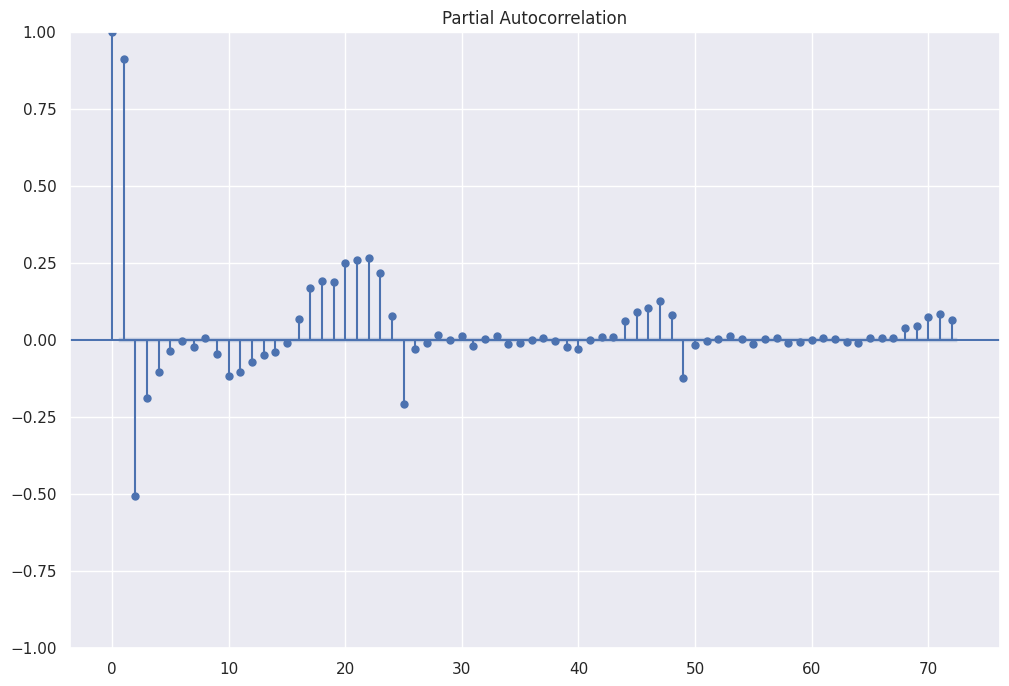

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data = pd.read_csv(f'{url_path}/datasets/time_series_solar.csv',
                   parse_dates=['Datetime'],
                   index_col='Datetime')

series = data['Incoming Solar']

series_daily = series.resample('D').sum()

acf_scores = acf(x=series_daily, nlags=365)
pacf_scores = pacf(x=series_daily, nlags=365)

acf_plot_ = plot_acf(series_daily, lags=365)
pacf_plot_ = plot_pacf(series_daily, lags=365)
plot = plot_acf(series, lags=48)
plot = plot_acf(series, lags=365 * 24 * 2)
plot = plot_pacf(series, lags=72)

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.6 MB/s eta 0:00:00


0

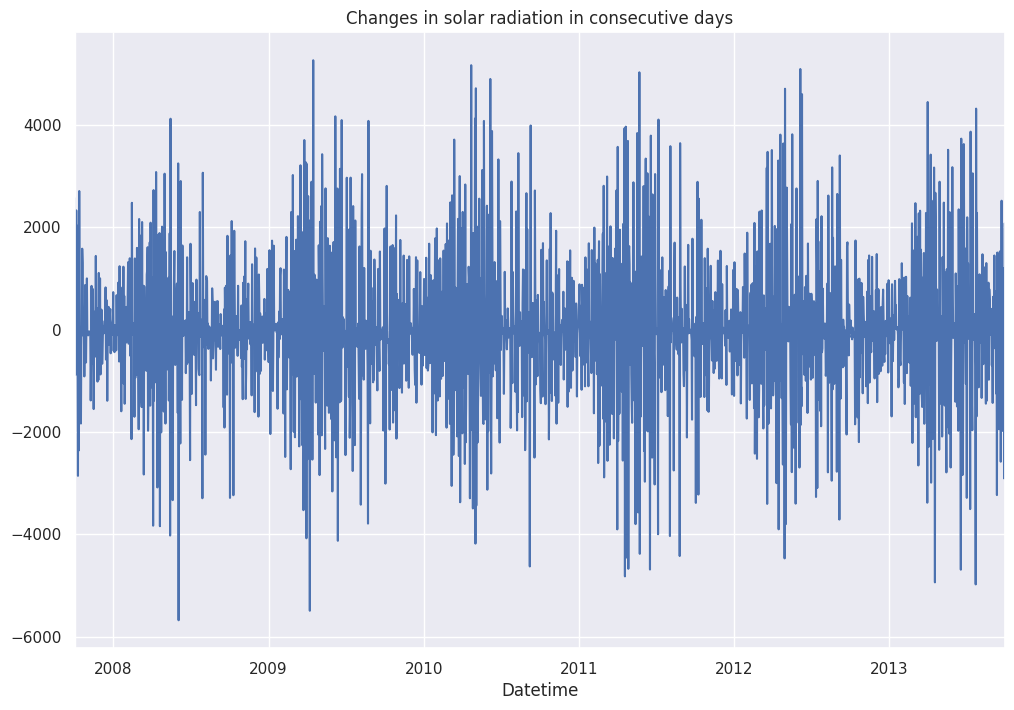

In [ ]:
from pmdarima.arima import ndiffs, nsdiffs

series_daily = series.resample('D').sum()

ndiffs(x=series_daily, test='kpss')
ndiffs(x=series_daily, test='adf')

series_changes = series_daily.diff()[1:]
plt = series_changes.plot(title='Changes in solar radiation in consecutive days')

plt.figure.savefig('uts_daily_changes.png')

nsdiffs(x=series_changes, test='ch', m=365)
nsdiffs(x=series_changes, test='ocsb', m=365)

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from scipy import stats

series = data['Incoming Solar']

series_daily = series.resample('D').sum()

series_df = series_daily.reset_index(drop=True).reset_index()
series_df.columns = ['time', 'value']
series_df['time'] += 1

olsr = ols('value ~ time', series_df).fit()

_, pval_white, _, _ = sms.het_white(olsr.resid, olsr.model.exog)
_, pval_bp, _, _ = sms.het_breuschpagan(olsr.resid, olsr.model.exog)

print(pval_white)
print(pval_bp)


class LogTransformation:

    @staticmethod
    def transform(x):
        xt = np.sign(x) * np.log(np.abs(x) + 1)

        return xt

    @staticmethod
    def inverse_transform(xt):
        x = np.sign(xt) * (np.exp(np.abs(xt)) - 1)

        return x


series_log = LogTransformation.transform(series_daily)

series_transformed, lmbda = stats.boxcox(series_daily + 1)

series_transformed = pd.Series(series_transformed, index=series_daily.index)

0.21360455192795955
0.20630757319132864


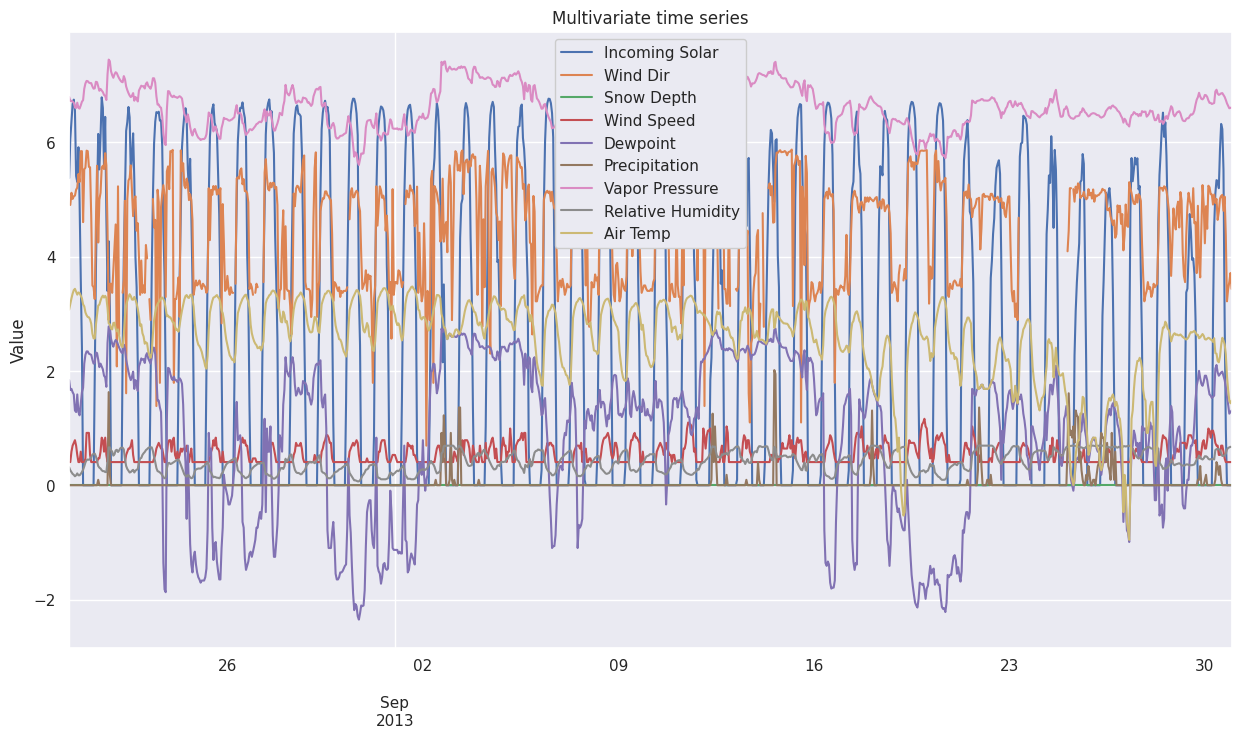

In [ ]:
data = pd.read_csv(f'{url_path}/datasets/time_series_smf1.csv',
                   parse_dates=['datetime'],
                   index_col='datetime')


class LogTransformation:

    @staticmethod
    def transform(x):
        xt = np.sign(x) * np.log(np.abs(x) + 1)

        return xt

    @staticmethod
    def inverse_transform(xt):
        x = np.sign(xt) * (np.exp(np.abs(xt)) - 1)

        return x


data_log = LogTransformation.transform(data)

mv_plot = data_log.tail(1000).plot(figsize=(15, 8),
                                   title='Multivariate time series',
                                   xlabel='',
                                   ylabel='Value')
mv_plot.legend(fancybox=True, framealpha=1)
mv_plot.figure.savefig('mts_plot.png')

In [ ]:
import torch
print(torch.__version__)

2.2.1+cu121


In [ ]:
series = pd.read_csv(
f"{url_path}/datasets/time_series_solar.csv",
parse_dates=["Datetime"],
index_col="Datetime",
)['Incoming Solar']

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
  n_vars = 1 if len(data.shape) == 1 else data.shape[1]
  df = pd.DataFrame(data)
  cols, names = list(), list()
  for i in range(n_in, 0, -1):
    cols.append(df.shift(i))
    names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]

    for i in range(0, n_out):
      cols.append(df.shift(-i))
      if i == 0:
        names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
      else:
        names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]

  agg = pd.concat(cols, axis=1)
  agg.columns = names
  if dropnan:
    agg.dropna(inplace=True)

  return agg
data = series_to_supervised(series, 3)
print(data)

                     var1(t-3)  var1(t)  var1(t-2)  var1(t)  var1(t-1)  \
Datetime                                                                 
2007-10-01 03:00:00        0.0      0.0        0.0      0.0        0.0   
2007-10-01 04:00:00        0.0      0.0        0.0      0.0        0.0   
2007-10-01 05:00:00        0.0      0.0        0.0      0.0        0.0   
2007-10-01 06:00:00        0.0      0.0        0.0      0.0        0.0   
2007-10-01 07:00:00        0.0      1.0        0.0      1.0        0.0   
...                        ...      ...        ...      ...        ...   
2013-09-30 19:00:00      249.7      0.0       17.5      0.0        1.7   
2013-09-30 20:00:00       17.5      0.0        1.7      0.0        0.0   
2013-09-30 21:00:00        1.7      0.0        0.0      0.0        0.0   
2013-09-30 22:00:00        0.0      0.0        0.0      0.0        0.0   
2013-09-30 23:00:00        0.0      0.0        0.0      0.0        0.0   

                     var1(t)  
Dateti

In [ ]:
series = series.resample('D').sum()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))

train, test = train_test_split(data, test_size=0.2, shuffle=False)

train = scaler.fit_transform(train)
test = scaler.transform(test)

X_train, y_train = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]

X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor).view(-1)
y_test = torch.from_numpy(y_test).type(torch.Tensor).view(-1)

In [ ]:
X_train.size()

torch.Size([42084, 5])

In [ ]:
url_path

'https://raw.githubusercontent.com/PacktPublishing/Deep-Learning-for-Time-Series-Data-Cookbook/main/assets/'

## Simple Neural Network

In [ ]:
import torch
import torch.nn as nn
class FeedForwardNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.activation = nn.ReLU()

    def forward(self, x):
        out = self.activation(self.fc1(x))
        out = self.fc2(out)
        return out


In [ ]:
model = FeedForwardNN(input_dim=X_train.shape[1],
                      hidden_dim=32,
                      output_dim=1)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

epochs = 200

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    out = model(X_train).reshape(-1,)
    loss = loss_fn(out, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, Loss: {loss.item()}")


Epoch: 0, Loss: 0.35393205285072327
Epoch: 10, Loss: 0.023734429851174355
Epoch: 20, Loss: 0.004944908432662487
Epoch: 30, Loss: 0.002944275503978133
Epoch: 40, Loss: 0.0014815025497227907
Epoch: 50, Loss: 0.001418023370206356
Epoch: 60, Loss: 0.0007238481193780899
Epoch: 70, Loss: 0.0005563749000430107
Epoch: 80, Loss: 0.000460011709947139
Epoch: 90, Loss: 0.0003893018001690507
Epoch: 100, Loss: 0.0003312635817565024
Epoch: 110, Loss: 0.00028185240807943046
Epoch: 120, Loss: 0.000241916612139903
Epoch: 130, Loss: 0.00020965703879483044
Epoch: 140, Loss: 0.00018398131942376494
Epoch: 150, Loss: 0.00016341067384928465
Epoch: 160, Loss: 0.00014683442714158446
Epoch: 170, Loss: 0.00013335130643099546
Epoch: 180, Loss: 0.00012219380005262792
Epoch: 190, Loss: 0.00011273307609371841


In [ ]:
model.eval()
y_pred = model(X_test).reshape(-1,)
test_loss = loss_fn(y_pred, y_test)
loss_baseline = {
    "name": "FeedForwardNN",
    "loss": test_loss.item()
}
print(f"Test Loss: {test_loss.item()}")


Test Loss: 0.00011414524487918243


## LSTM

In [ ]:
X_train = X_train.view([X_train.shape[0], X_train.shape[1], 1])
X_test = X_test.view([X_test.shape[0], X_test.shape[1], 1])


In [ ]:
X_train.size()

torch.Size([42084, 5, 1])

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :])

        return out


In [ ]:
model = LSTM(input_dim=1,
             hidden_dim=32,
             output_dim=1,
             num_layers=1)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 200

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    out = model(X_train).reshape(-1, )
    loss = loss_fn(out, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, Loss: {loss.item()}")


Epoch: 0, Loss: 1.0005851984024048
Epoch: 10, Loss: 0.8116989731788635
Epoch: 20, Loss: 0.6257517337799072
Epoch: 30, Loss: 0.4221518933773041
Epoch: 40, Loss: 0.2159332036972046
Epoch: 50, Loss: 0.1215808093547821
Epoch: 60, Loss: 0.12465069442987442
Epoch: 70, Loss: 0.10004270821809769
Epoch: 80, Loss: 0.09056780487298965
Epoch: 90, Loss: 0.07819574326276779
Epoch: 100, Loss: 0.06873760372400284
Epoch: 110, Loss: 0.06014010310173035
Epoch: 120, Loss: 0.053219325840473175
Epoch: 130, Loss: 0.04800543561577797
Epoch: 140, Loss: 0.04438867047429085
Epoch: 150, Loss: 0.04207310453057289
Epoch: 160, Loss: 0.04059455543756485
Epoch: 170, Loss: 0.03949183598160744
Epoch: 180, Loss: 0.038483768701553345
Epoch: 190, Loss: 0.037471793591976166


In [ ]:
model.eval()
y_pred = model(X_test).reshape(-1, )
test_loss = loss_fn(y_pred, y_test)
loss_lstm = {
    "name": "LSTM",
    "loss": test_loss.item()
}
print(f"Test Loss: {test_loss.item()}")

Test Loss: 0.04055427014827728


## GRUs


In [ ]:
class GRUNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1, num_layers=2):
        super(GRUNet, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
model = GRUNet(input_dim=1,
               hidden_dim=32,
               output_dim=1,
               num_layers=1)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 200

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    out = model(X_train).reshape(-1, )
    loss = loss_fn(out, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, Loss: {loss.item()}")


Epoch: 0, Loss: 0.5803965926170349
Epoch: 10, Loss: 0.40618860721588135
Epoch: 20, Loss: 0.25353801250457764
Epoch: 30, Loss: 0.13512402772903442
Epoch: 40, Loss: 0.09813086688518524
Epoch: 50, Loss: 0.08901821076869965
Epoch: 60, Loss: 0.07194235175848007
Epoch: 70, Loss: 0.061291057616472244
Epoch: 80, Loss: 0.05077289789915085
Epoch: 90, Loss: 0.042644109576940536
Epoch: 100, Loss: 0.03646568953990936
Epoch: 110, Loss: 0.03239810839295387
Epoch: 120, Loss: 0.030172748491168022
Epoch: 130, Loss: 0.02907281555235386
Epoch: 140, Loss: 0.028365593403577805
Epoch: 150, Loss: 0.027675533667206764
Epoch: 160, Loss: 0.02693747542798519
Epoch: 170, Loss: 0.026169514283537865
Epoch: 180, Loss: 0.025366367772221565
Epoch: 190, Loss: 0.024511253461241722


In [ ]:
model.eval()
y_pred = model(X_test).reshape(-1, )
test_loss = loss_fn(y_pred, y_test)
loss_GRU = {
    "name": "GRU",
    "loss": test_loss.item()
}
print(f"Test Loss: {test_loss.item()}")

Test Loss: 0.026225442066788673


## Stacked LSTMs

In [ ]:
class StackedLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1, num_layers=2):
        super(StackedLSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out



In [ ]:
model = StackedLSTM(input_dim=1, hidden_dim=32, output_dim=1, num_layers=2)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 200

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    out = model(X_train).reshape(-1,)
    loss = loss_fn(out, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, Loss: {loss.item()}")



Epoch: 0, Loss: 0.5936060547828674
Epoch: 10, Loss: 0.4358339309692383
Epoch: 20, Loss: 0.29320675134658813
Epoch: 30, Loss: 0.1823224574327469
Epoch: 40, Loss: 0.17741142213344574
Epoch: 50, Loss: 0.14762087166309357
Epoch: 60, Loss: 0.1258687674999237
Epoch: 70, Loss: 0.10273060947656631
Epoch: 80, Loss: 0.08168916404247284
Epoch: 90, Loss: 0.06671153753995895
Epoch: 100, Loss: 0.058578696101903915
Epoch: 110, Loss: 0.05427447333931923
Epoch: 120, Loss: 0.05006673187017441
Epoch: 130, Loss: 0.045529477298259735
Epoch: 140, Loss: 0.04133547097444534
Epoch: 150, Loss: 0.037524085491895676
Epoch: 160, Loss: 0.034102946519851685
Epoch: 170, Loss: 0.030877986922860146
Epoch: 180, Loss: 0.0276035126298666
Epoch: 190, Loss: 0.024056941270828247


In [ ]:
model.eval()
y_pred = model(X_test).reshape(-1,)
test_loss = loss_fn(y_pred, y_test)
loss_stacked = {
    "name": "Stacked LSTM",
    "loss": test_loss.item()
}
print(f"Test Loss: {test_loss.item()}")

Test Loss: 0.022257095202803612


## Hybrid LSTM


In [ ]:
import torch.nn.functional as F
class HybridLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1, num_layers=1):
        super(HybridLSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc1 = nn.Linear(hidden_dim, 50)
        self.fc2 = nn.Linear(50, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = F.relu(self.fc1(out[:, -1, :]))
        out = self.fc2(out)
        return out

In [ ]:
model = HybridLSTM(input_dim=1, hidden_dim=32, output_dim=1, num_layers=1)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 200

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    out = model(X_train).reshape(-1, )
    loss = loss_fn(out, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, Loss: {loss.item()}")


Epoch: 0, Loss: 0.6058174967765808
Epoch: 10, Loss: 0.445010781288147
Epoch: 20, Loss: 0.32142579555511475
Epoch: 30, Loss: 0.22378766536712646
Epoch: 40, Loss: 0.16277052462100983
Epoch: 50, Loss: 0.14007867872714996
Epoch: 60, Loss: 0.10353823006153107
Epoch: 70, Loss: 0.07035339623689651
Epoch: 80, Loss: 0.0476008839905262
Epoch: 90, Loss: 0.03945929929614067
Epoch: 100, Loss: 0.03709182143211365
Epoch: 110, Loss: 0.03370014578104019
Epoch: 120, Loss: 0.030905144289135933
Epoch: 130, Loss: 0.028821472078561783
Epoch: 140, Loss: 0.02704107202589512
Epoch: 150, Loss: 0.025494180619716644
Epoch: 160, Loss: 0.024013467133045197
Epoch: 170, Loss: 0.022532304748892784
Epoch: 180, Loss: 0.020987166091799736
Epoch: 190, Loss: 0.019347550347447395


In [ ]:
model.eval()
y_pred = model(X_test).reshape(-1, )
test_loss = loss_fn(y_pred, y_test)
loss_hybrid = {
    "name": "Hybrid LSTM",
    "loss": test_loss.item()
}
print(f"Test Loss: {test_loss.item()}")

Test Loss: 0.019314181059598923


## CNN

In [ ]:
X_train = X_train.view([X_train.shape[0], 1, X_train.shape[1]])
X_test = X_test.view([X_test.shape[0], 1, X_test.shape[1]])

In [ ]:
class CNNTimeseries(nn.Module):
    def __init__(self, input_dim, output_dim=1):
        super(CNNTimeseries, self).__init__()

        self.conv1 = nn.Conv1d(in_channels=input_dim,
                               out_channels=64,
                               kernel_size=3,
                               stride=1,
                               padding=1)
        self.fc = nn.Linear(in_features=64,
                            out_features=output_dim)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [ ]:
model = CNNTimeseries(input_dim=X_train.size()[1], output_dim=1)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 200

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    out = model(X_train).reshape(-1, )
    loss = loss_fn(out, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, Loss: {loss.item()}")

RuntimeError: Given groups=1, weight of size [64, 3, 3], expected input[42084, 1, 5] to have 3 channels, but got 1 channels instead

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if len(data.shape) == 1 else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [("var%d(t-%d)" % (j + 1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [("var%d(t)" % (j + 1)) for j in range(n_vars)]
        else:
            names += [("var%d(t+%d)" % (j + 1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg


series = pd.read_csv(
    f"{url_path}/datasets/time_series_solar.csv",
    parse_dates=["Datetime"],
    index_col="Datetime",
)['Incoming Solar']

# Resample the data to daily frequency
series = series.resample('D').sum()

data = series_to_supervised(series, n_in=3)

# ---

scaler = MinMaxScaler(feature_range=(-1, 1))
train, test = train_test_split(data, test_size=0.2, shuffle=False)
train = scaler.fit_transform(train)
test = scaler.transform(test)

X_train, y_train = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]

X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor).view(-1)
y_test = torch.from_numpy(y_test).type(torch.Tensor).view(-1)

X_train = X_train.view([X_train.shape[0], X_train.shape[1], 1])
X_test = X_test.view([X_test.shape[0], X_test.shape[1], 1])


class CNNTimeseries(nn.Module):
    def __init__(self, input_dim, output_dim=1):
        super(CNNTimeseries, self).__init__()

        self.conv1 = nn.Conv1d(in_channels=input_dim,
                               out_channels=64,
                               kernel_size=3,
                               stride=1,
                               padding=1)
        self.fc = nn.Linear(in_features=64,
                            out_features=output_dim)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


model = CNNTimeseries(input_dim=3, output_dim=1)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    out = model(X_train).reshape(-1, )
    loss = loss_fn(out, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, Loss: {loss.item()}")


model.eval()
y_pred = model(X_test).reshape(-1, )
test_loss = loss_fn(y_pred, y_test)
loss_cnn = {
    "name": "CNN",
    "loss": test_loss.item()
}
print(f"Test Loss: {test_loss.item()}")

Epoch: 0, Loss: 0.4765317440032959
Epoch: 10, Loss: 0.37313345074653625
Epoch: 20, Loss: 0.2896653711795807
Epoch: 30, Loss: 0.22343631088733673
Epoch: 40, Loss: 0.17273780703544617
Epoch: 50, Loss: 0.13743379712104797
Epoch: 60, Loss: 0.11696404218673706
Epoch: 70, Loss: 0.10842197388410568
Epoch: 80, Loss: 0.10645996034145355
Epoch: 90, Loss: 0.10622213035821915
Epoch: 100, Loss: 0.10575546324253082
Epoch: 110, Loss: 0.10513459891080856
Epoch: 120, Loss: 0.10465005785226822
Epoch: 130, Loss: 0.10429349541664124
Epoch: 140, Loss: 0.10402476042509079
Epoch: 150, Loss: 0.1038181334733963
Epoch: 160, Loss: 0.10364098101854324
Epoch: 170, Loss: 0.10349955409765244
Epoch: 180, Loss: 0.10336709022521973
Epoch: 190, Loss: 0.1032436341047287
Test Loss: 0.09412559121847153


## CNN-LSTM

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class ConvLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1, num_layers=1):
        super(ConvLSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        # Define the Conv1D layer
        self.conv1 = nn.Conv1d(in_channels=input_dim,
                               out_channels=64,
                               kernel_size=3,
                               stride=1,
                               padding=1)

        # Define the LSTM layer
        self.lstm = nn.LSTM(64, hidden_dim, num_layers, batch_first=True)

        # Fully connected layers
        self.fc1 = nn.Linear(hidden_dim, 50)
        self.fc2 = nn.Linear(50, output_dim)

    def forward(self, x):
        # Apply Conv1D layer
        x = F.relu(self.conv1(x))

        # Apply LSTM layer
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
        out, _ = self.lstm(x, (h0, c0))

        # Fully connected layers
        out = F.relu(self.fc1(out[:, -1, :]))
        out = self.fc2(out)
        return out


In [ ]:

class ConvLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1, num_layers=1):
        super(ConvLSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        # Define the Conv1D layer
        self.conv1 = nn.Conv1d(in_channels=input_dim,
                               out_channels=64,
                               kernel_size=3,
                               stride=1,
                               padding=1)

        # Define the LSTM layer
        self.lstm = nn.LSTM(64, hidden_dim, num_layers, batch_first=True)

        # Fully connected layers
        self.fc1 = nn.Linear(hidden_dim, 50)
        self.fc2 = nn.Linear(50, output_dim)

    def forward(self, x):
      # Apply Conv1D layer
      x = F.relu(self.conv1(x))

      # Reshape the output from Conv1D for LSTM
      # Transpose the Conv1D output to match LSTM input expectations
      x = x.transpose(1, 2)

      # Initialize hidden state and cell state for LSTM
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
      c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)

      # Apply LSTM layer
      out, _ = self.lstm(x, (h0, c0))

      # Flatten the output for the fully connected layer
      out = out.reshape(out.size(0), -1)

      # Apply fully connected layers
      out = F.relu(self.fc1(out))
      out = self.fc2(out)
      return out


In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if len(data.shape) == 1 else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [("var%d(t-%d)" % (j + 1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [("var%d(t)" % (j + 1)) for j in range(n_vars)]
        else:
            names += [("var%d(t+%d)" % (j + 1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg


series = pd.read_csv(
    f"{url_path}/datasets/time_series_solar.csv",
    parse_dates=["Datetime"],
    index_col="Datetime",
)['Incoming Solar']

# Resample the data to daily frequency
series = series.resample('D').sum()

data = series_to_supervised(series, n_in=3)

# ---

scaler = MinMaxScaler(feature_range=(-1, 1))
train, test = train_test_split(data, test_size=0.2, shuffle=False)
train = scaler.fit_transform(train)
test = scaler.transform(test)

X_train, y_train = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]

X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor).view(-1)
y_test = torch.from_numpy(y_test).type(torch.Tensor).view(-1)

X_train = X_train.view([X_train.shape[0], X_train.shape[1], 1])
X_test = X_test.view([X_test.shape[0], X_test.shape[1], 1])
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if len(data.shape) == 1 else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [("var%d(t-%d)" % (j + 1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [("var%d(t)" % (j + 1)) for j in range(n_vars)]
        else:
            names += [("var%d(t+%d)" % (j + 1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg


series = pd.read_csv(
    f"{url_path}/datasets/time_series_solar.csv",
    parse_dates=["Datetime"],
    index_col="Datetime",
)['Incoming Solar']

# Resample the data to daily frequency
series = series.resample('D').sum()

data = series_to_supervised(series, n_in=3)

# ---

scaler = MinMaxScaler(feature_range=(-1, 1))
train, test = train_test_split(data, test_size=0.2, shuffle=False)
train = scaler.fit_transform(train)
test = scaler.transform(test)

X_train, y_train = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]

X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor).view(-1)
y_test = torch.from_numpy(y_test).type(torch.Tensor).view(-1)

X_train = X_train.view([X_train.shape[0], X_train.shape[1], 1])
X_test = X_test.view([X_test.shape[0], X_test.shape[1], 1])

In [ ]:
model = ConvLSTM(input_dim=3, output_dim=1,hidden_dim=32)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    out = model(X_train).reshape(-1, )
    loss = loss_fn(out, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, Loss: {loss.item()}")


model.eval()
y_pred = model(X_test).reshape(-1, )
test_loss = loss_fn(y_pred, y_test)
loss_cnnlstm = {
    "name": "CNN-LSTM",
    "loss": test_loss.item()
}
print(f"Test Loss: {test_loss.item()}")

Epoch: 0, Loss: 0.33034616708755493
Epoch: 10, Loss: 0.31380990147590637
Epoch: 20, Loss: 0.2864548861980438
Epoch: 30, Loss: 0.24046023190021515
Epoch: 40, Loss: 0.17800547182559967
Epoch: 50, Loss: 0.12970390915870667
Epoch: 60, Loss: 0.11301346868276596
Epoch: 70, Loss: 0.11264874786138535
Epoch: 80, Loss: 0.10861225426197052
Epoch: 90, Loss: 0.10735786706209183
Epoch: 100, Loss: 0.10637214034795761
Epoch: 110, Loss: 0.10540135204792023
Epoch: 120, Loss: 0.1046314388513565
Epoch: 130, Loss: 0.10402735322713852
Epoch: 140, Loss: 0.10352550446987152
Epoch: 150, Loss: 0.1031014621257782
Epoch: 160, Loss: 0.10274475812911987
Epoch: 170, Loss: 0.10243719071149826
Epoch: 180, Loss: 0.10215628892183304
Epoch: 190, Loss: 0.10195224732160568
Test Loss: 0.09321099519729614


In [ ]:
# ... (previous code)

epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    out = model(X_train).reshape(-1, )
    loss = loss_fn(out, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, Loss: {loss.item()}")

# Debugging: Print input shapes
print("Input shape (X_train):", X_train.shape)
print("Output shape (y_train):", y_train.shape)

model.eval()
y_pred = model(X_test).reshape(-1, )
test_loss = loss_fn(y_pred, y_test)
print(f"Test Loss: {test_loss.item()}")

RuntimeError: input.size(-1) must be equal to input_size. Expected 64, got 1

In [ ]:
model(X_train[0])

RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x1 and 64x1)

## Parallel CNN LSTM


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ConvLSTMConcat(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1, num_layers=1):
        super(ConvLSTMConcat, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        # Define the Conv1D layer
        self.conv1 = nn.Conv1d(in_channels=input_dim,
                               out_channels=64,
                               kernel_size=3,
                               stride=1,
                               padding=1)

        # Define the LSTM layer
        self.lstm = nn.LSTM(64, hidden_dim, num_layers, batch_first=True)

        # Fully connected layers
        self.fc1 = nn.Linear(hidden_dim * 2, 50)  # Concatenated output size
        self.fc2 = nn.Linear(50, output_dim)

    def forward(self, x):
        # Apply Conv1D layer
        x_conv = F.relu(self.conv1(x))

        x_lstm = x

        # Initialize hidden state and cell state for LSTM
        h0 = torch.zeros(self.num_layers, x_lstm.size(0), self.hidden_dim).to(x_lstm.device)
        c0 = torch.zeros(self.num_layers, x_lstm.size(0), self.hidden_dim).to(x_lstm.device)

        # Apply LSTM layer
        out_lstm, _ = self.lstm(x_lstm, (h0, c0))

        # Concatenate Conv1D output and LSTM output
        combined_output = torch.cat((x_conv, out_lstm), dim=2)

        # Flatten the concatenated output for the fully connected layer
        out_fc = F.relu(self.fc1(combined_output))
        out_fc = self.fc2(out_fc)
        return out_fc



In [ ]:
model = ConvLSTMConcat(input_dim=3, output_dim=1,hidden_dim=32)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    out = model(X_train).reshape(-1, )
    loss = loss_fn(out, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, Loss: {loss.item()}")


model.eval()
y_pred = model(X_test).reshape(-1, )
test_loss = loss_fn(y_pred, y_test)
print(f"Test Loss: {test_loss.item()}")

RuntimeError: input.size(-1) must be equal to input_size. Expected 64, got 1

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ConvLSTMConcat(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1, num_layers=1):
        super(ConvLSTMConcat, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        # Define the Conv1D layer
        self.conv1 = nn.Conv1d(in_channels=input_dim,
                               out_channels=64,
                               kernel_size=3,
                               stride=1,
                               padding=1)

        # Define the LSTM layer
        self.lstm = nn.LSTM(64, hidden_dim, num_layers, batch_first=True)  # Adjust input size to 64

        # Fully connected layers
        self.fc1 = nn.Linear(hidden_dim * 2, 50)  # Concatenated output size
        self.fc2 = nn.Linear(50, output_dim)

    def forward(self, x):
        # Apply Conv1D layer
        x_conv = F.relu(self.conv1(x))

        # Initialize hidden state and cell state for LSTM
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)

        # Apply LSTM layer
        out_lstm, _ = self.lstm(x_conv.transpose(1, 2), (h0, c0))  # Use x_conv instead of x_lstm

        # Concatenate Conv1D output and LSTM output
        combined_output = torch.cat((x_conv.transpose(1, 2), out_lstm), dim=0)

        # Flatten the concatenated output for the fully connected layer
        out_fc = F.relu(self.fc1(combined_output))
        out_fc = self.fc2(out_fc)
        return out_fc




In [ ]:
model = ConvLSTMConcat(input_dim=3, output_dim=1,hidden_dim=32)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    out = model(X_train).reshape(-1, )
    loss = loss_fn(out, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, Loss: {loss.item()}")


model.eval()
y_pred = model(X_test).reshape(-1, )
test_loss = loss_fn(y_pred, y_test)
print(f"Test Loss: {test_loss.item()}")

RuntimeError: Sizes of tensors must match except in dimension 0. Expected size 64 but got size 32 for tensor number 1 in the list.

In [ ]:
class ParallelCNNLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(ParallelCNNLSTMModel, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=input_size, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            # nn.MaxPool1d(kernel_size=2, stride=2),
            nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            # nn.MaxPool1d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(out_features=128),
            nn.ReLU()
        )
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc_lstm = nn.Linear(hidden_size, 128)
        self.fc = nn.Linear(128*2, num_classes)

    def forward(self, x):
        #cnn takes input of shape (batch_size, channels, seq_len)
        x_cnn = x.permute(0, 1, 2)
        out_cnn = self.cnn(x_cnn)
        # lstm takes input of shape (batch_size, seq_len, input_size)
        out_lstm, _ = self.lstm(x)
        out_lstm = self.fc_lstm(out_lstm[:, -1, :])
        out = torch.cat([out_cnn, out_lstm], dim=1)
        out = self.fc(out)
        return out

In [ ]:
model = ParallelCNNLSTMModel(input_size=3, num_classes=1, hidden_size=32, num_layers=1)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    out = model(X_train).reshape(-1, )
    loss = loss_fn(out, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, Loss: {loss.item()}")


model.eval()
y_pred = model(X_test).reshape(-1, )
test_loss = loss_fn(y_pred, y_test)
loss_parallel = {
    "name": "Parallel CNN LSTM",
    "loss": test_loss.item()
}
print(f"Test Loss: {test_loss.item()}")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch: 0, Loss: 0.34979572892189026
Epoch: 10, Loss: 0.19596031308174133
Epoch: 20, Loss: 0.11379142105579376
Epoch: 30, Loss: 0.10687388479709625
Epoch: 40, Loss: 0.1069619357585907
Epoch: 50, Loss: 0.10547178238630295
Epoch: 60, Loss: 0.10425686836242676
Epoch: 70, Loss: 0.10334476083517075
Epoch: 80, Loss: 0.10273246467113495
Epoch: 90, Loss: 0.10231921076774597
Epoch: 100, Loss: 0.10201971977949142
Epoch: 110, Loss: 0.10177575796842575
Epoch: 120, Loss: 0.10158151388168335
Epoch: 130, Loss: 0.10139923542737961
Epoch: 140, Loss: 0.10124271363019943
Epoch: 150, Loss: 0.10110222548246384
Epoch: 160, Loss: 0.10096872597932816
Epoch: 170, Loss: 0.10081510990858078
Epoch: 180, Loss: 0.10062339901924133
Epoch: 190, Loss: 0.10044574737548828
Test Loss: 0.0935152992606163


In [ ]:
X_train.size()

torch.Size([1751, 3, 1])

## Plot Losses

In [ ]:
# Combine dictionaries into a list
all_losses = [loss_baseline, loss_lstm, loss_GRU, loss_stacked, loss_hybrid, loss_cnn, loss_cnnlstm, loss_parallel]

# Initialize empty lists for names and losses
names = []
loss_values = []

# Extract data from dictionaries
for loss_dict in all_losses:
    names.append(loss_dict["name"])
    loss_values.append(loss_dict["loss"])

# Create a combined dictionary
combined_dict = {"name": names, "loss": loss_values}

# Convert to a pandas DataFrame
df = pd.DataFrame(combined_dict)

Text(0.5, 0, '')

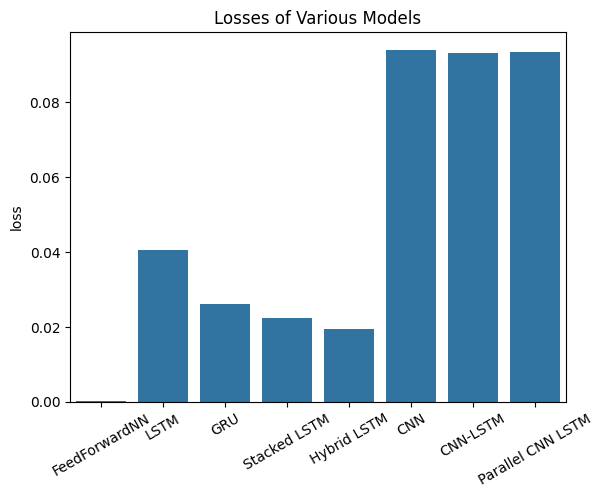

In [ ]:
sns.barplot(data=df, x='name', y='loss').set(title='Losses of Various Models')
plt.xticks(rotation=30)
plt.xlabel('')

<Axes: xlabel='name'>

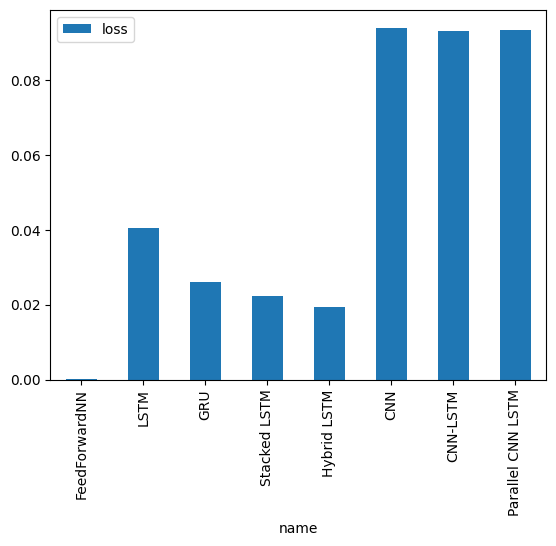

In [ ]:
df.set_index('name').plot(kind='bar')


In [ ]:
df

,name,loss
0,FeedForwardNN,0.000114
1,LSTM,0.040554
2,GRU,0.026225
3,Stacked LSTM,0.022257
4,Hybrid LSTM,0.019314
5,CNN,0.094126
6,CNN-LSTM,0.093211
7,Parallel CNN LSTM,0.093515
